In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df= pd.read_csv("covid-19.zip")
df.head()

,Date,Country/Region,Province/State,Lat,Long,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,NaN,33.93911,67.709953,0,0.0,0
1,2020-01-23,Afghanistan,NaN,33.93911,67.709953,0,0.0,0
2,2020-01-24,Afghanistan,NaN,33.93911,67.709953,0,0.0,0
3,2020-01-25,Afghanistan,NaN,33.93911,67.709953,0,0.0,0
4,2020-01-26,Afghanistan,NaN,33.93911,67.709953,0,0.0,0


In [3]:
df.rename(columns={
    'Country/Region': 'Country',
    'Province/State': 'State'
}, inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72090 entries, 0 to 72089
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       72090 non-null  object 
 1   Country    72090 non-null  object 
 2   State      21870 non-null  object 
 3   Lat        72090 non-null  float64
 4   Long       72090 non-null  float64
 5   Confirmed  72090 non-null  int64  
 6   Recovered  68310 non-null  float64
 7   Deaths     72090 non-null  int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 4.4+ MB


In [5]:
# find all null 
df.isnull().sum()

Date             0
Country          0
State        50220
Lat              0
Long             0
Confirmed        0
Recovered     3780
Deaths           0
dtype: int64

In [6]:
df['State'] = df['State'].fillna('Unknown')
df['Recovered'] = df['Recovered'].fillna(0)

In [7]:
df['Date'] = pd.to_datetime(df['Date']) # convert to date time
df.head()

,Date,Country,State,Lat,Long,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,Unknown,33.93911,67.709953,0,0.0,0
1,2020-01-23,Afghanistan,Unknown,33.93911,67.709953,0,0.0,0
2,2020-01-24,Afghanistan,Unknown,33.93911,67.709953,0,0.0,0
3,2020-01-25,Afghanistan,Unknown,33.93911,67.709953,0,0.0,0
4,2020-01-26,Afghanistan,Unknown,33.93911,67.709953,0,0.0,0


In [8]:
df_grouped = df.groupby(['Date', 'Country']).agg({
    "Confirmed" : 'sum',
    "Recovered" : 'sum',
    'Deaths' : 'sum'
}).reset_index()

print(df_grouped.head(10))

        Date              Country  Confirmed  Recovered  Deaths
0 2020-01-22          Afghanistan          0        0.0       0
1 2020-01-22              Albania          0        0.0       0
2 2020-01-22              Algeria          0        0.0       0
3 2020-01-22              Andorra          0        0.0       0
4 2020-01-22               Angola          0        0.0       0
5 2020-01-22  Antigua and Barbuda          0        0.0       0
6 2020-01-22            Argentina          0        0.0       0
7 2020-01-22              Armenia          0        0.0       0
8 2020-01-22            Australia          0        0.0       0
9 2020-01-22              Austria          0        0.0       0


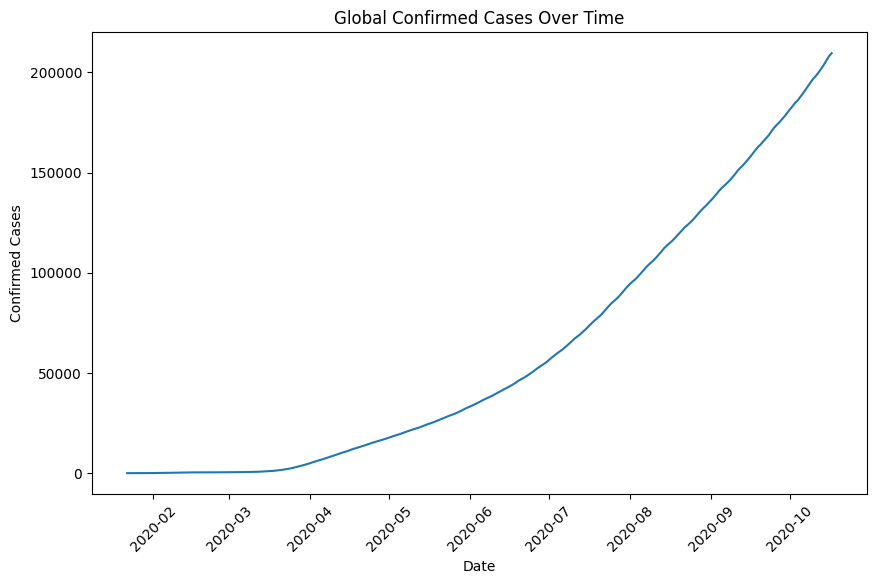

In [9]:
# Global Confirmed Cases Over Time
plt.figure(figsize=(10,6))
sns.lineplot(data=df_grouped, x='Date', y='Confirmed', ci=None)

plt.title("Global Confirmed Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.xticks(rotation=45)

plt.show()

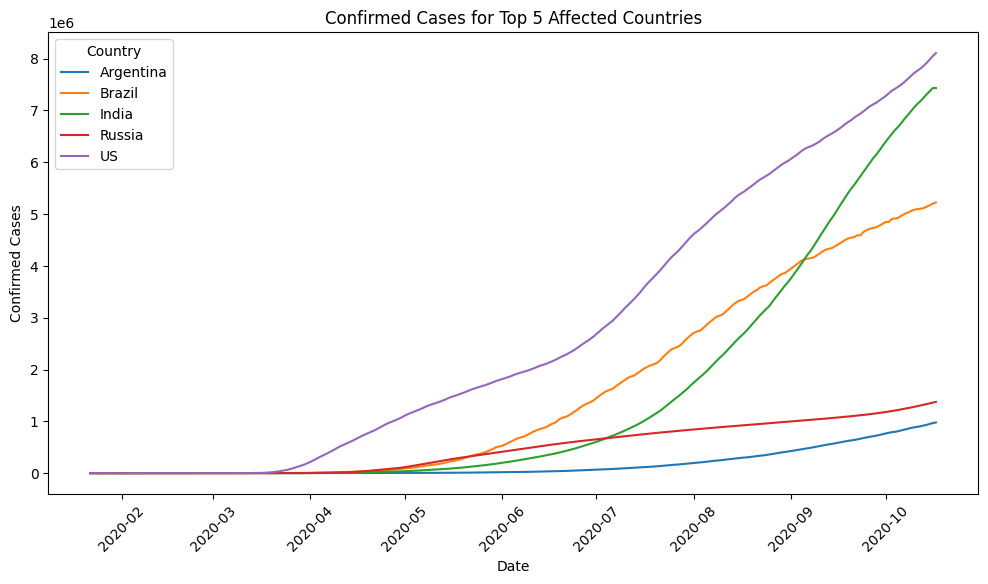

In [10]:
top_countries = df_grouped.groupby('Country')['Confirmed'].max().nlargest(5).index
df_top = df_grouped[df_grouped['Country'].isin(top_countries)]

plt.figure(figsize=(12,6))
sns.lineplot(data=df_top, x='Date', y='Confirmed', hue='Country')

plt.title('Confirmed Cases for Top 5 Affected Countries')
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.legend(title ='Country')
plt.xticks(rotation=45)

plt.show()

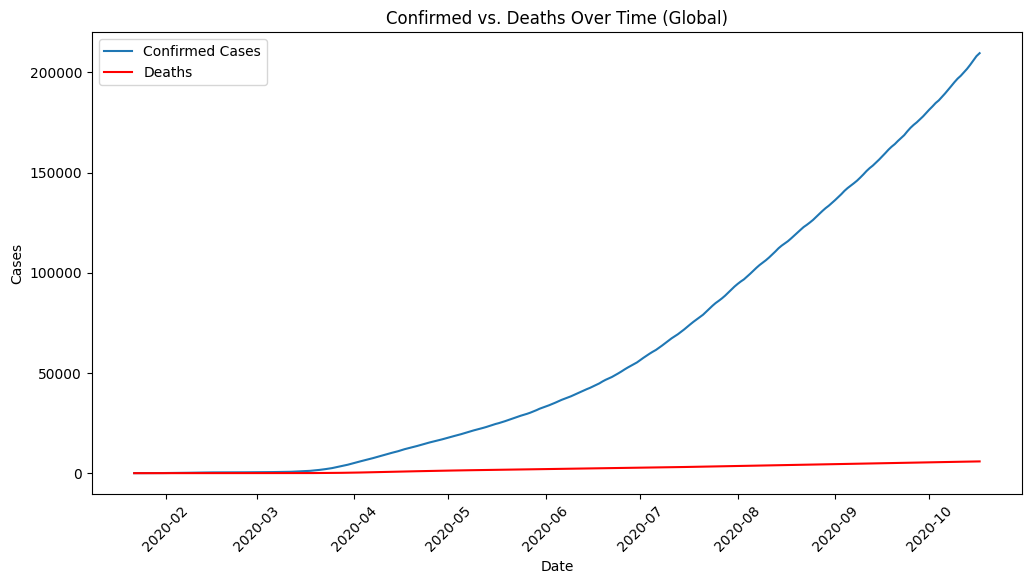

In [11]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df_grouped, x='Date', y='Confirmed', label="Confirmed Cases", ci=None)
sns.lineplot(data=df_grouped, x='Date', y='Deaths', label="Deaths", ci=None, color='red')

plt.title("Confirmed vs. Deaths Over Time (Global)")
plt.xlabel("Date")
plt.ylabel("Cases")
plt.xticks(rotation=45)
plt.legend()

plt.show()

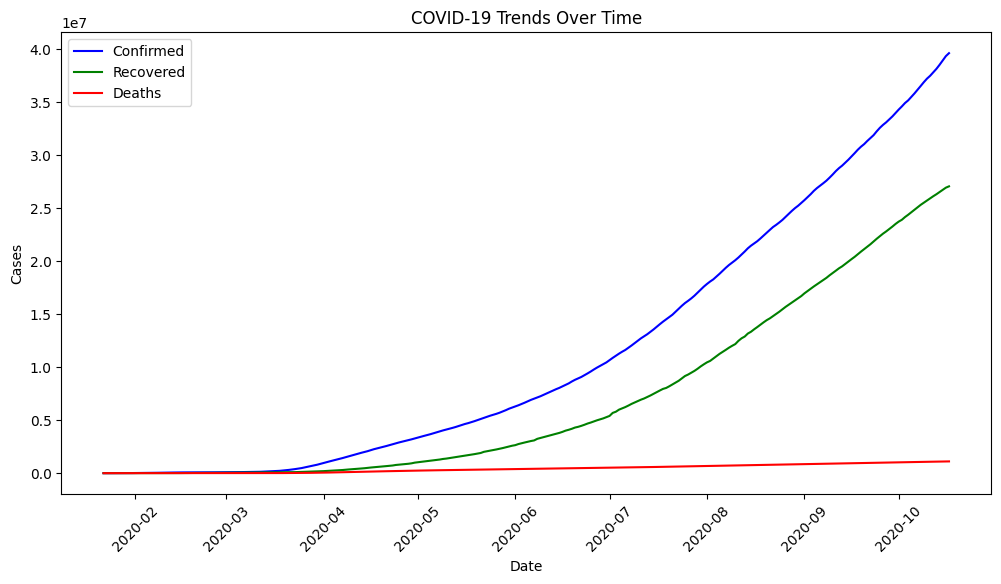

In [12]:
plt.figure(figsize=(12,6))
plt.plot(df_grouped.groupby("Date")["Confirmed"].sum(), label="Confirmed", color='blue')
plt.plot(df_grouped.groupby("Date")["Recovered"].sum(), label="Recovered", color='green')
plt.plot(df_grouped.groupby("Date")["Deaths"].sum(), label="Deaths", color='red')
plt.title("COVID-19 Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Cases")
plt.legend()
plt.xticks(rotation=45)
plt.show()


In [13]:
df_grouped['New Confirmed'] = df_grouped.groupby('Country')['Confirmed'].diff().fillna(0)
df_grouped['New Recovered'] = df_grouped.groupby('Country')['Recovered'].diff().fillna(0)
df_grouped['New Deaths'] = df_grouped.groupby('Country')['Deaths'].diff().fillna(0)

df_grouped.head()

,Date,Country,Confirmed,Recovered,Deaths,New Confirmed,New Recovered,New Deaths
0,2020-01-22,Afghanistan,0,0.0,0,0.0,0.0,0.0
1,2020-01-22,Albania,0,0.0,0,0.0,0.0,0.0
2,2020-01-22,Algeria,0,0.0,0,0.0,0.0,0.0
3,2020-01-22,Andorra,0,0.0,0,0.0,0.0,0.0
4,2020-01-22,Angola,0,0.0,0,0.0,0.0,0.0


In [14]:
df_grouped['Active_Cases'] = df_grouped['Confirmed'] - df_grouped['Recovered'] - df_grouped['Deaths']
df_grouped['Recovery_Rate'] = df_grouped['Recovered'] / df_grouped['Confirmed']
df_grouped['Death_Rate'] = df_grouped['Deaths'] / df_grouped['Confirmed']
df_grouped = df_grouped.fillna(0)  # Handle NaN values


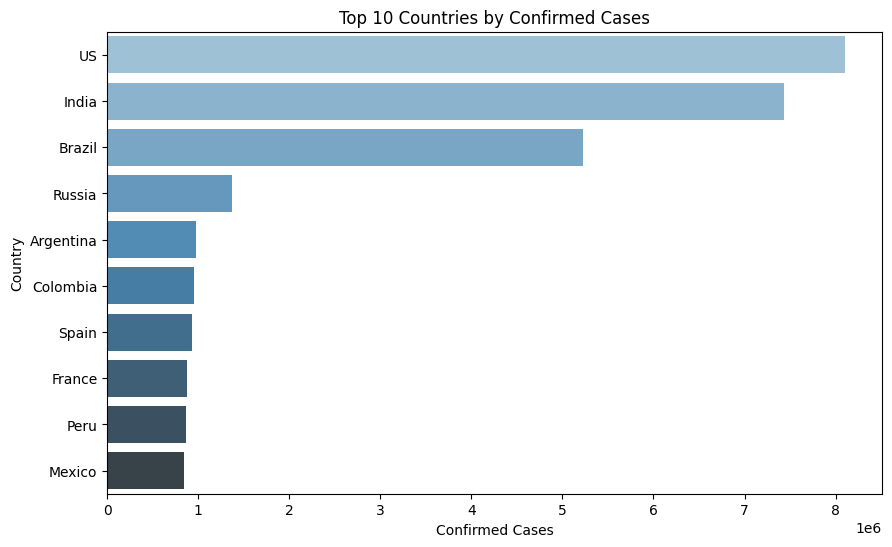

In [15]:
# Bar Plots: Top Countries
df_latest = df[df['Date'] == df['Date'].max()]
top_countries = df_latest.groupby('Country')['Confirmed'].sum().nlargest(10).reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=top_countries, x='Confirmed', y='Country', palette='Blues_d')

plt.title('Top 10 Countries by Confirmed Cases')
plt.xlabel('Confirmed Cases')
plt.ylabel('Country')

plt.show()

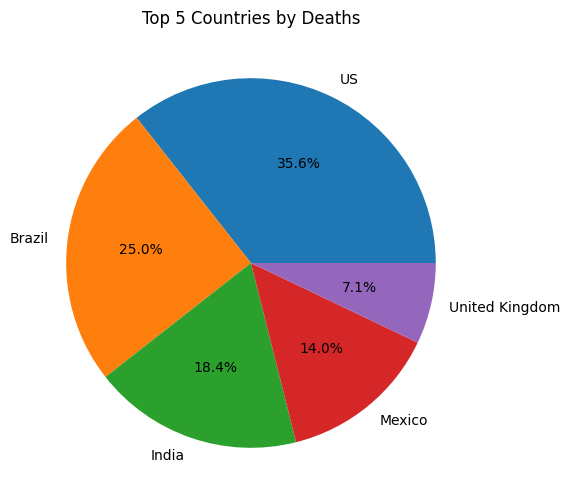

In [16]:
# Pie Chart (Deaths Proportion by Top 5 Countries)
top_deaths = df_latest.groupby('Country')['Deaths'].sum().nlargest(5)
top_deaths.plot.pie(autopct='%1.1f%%', figsize=(6,6), title='Top 5 Countries by Deaths')
plt.ylabel('')

plt.show()

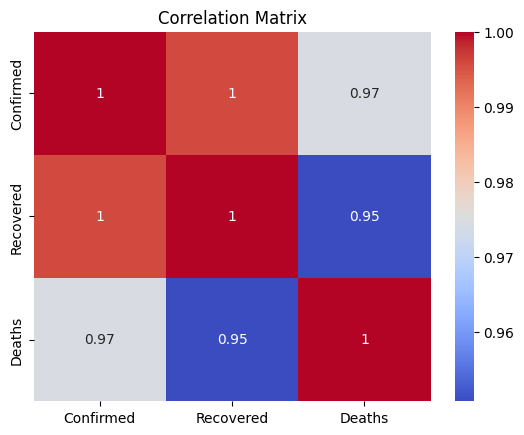

In [17]:
# Heatmap (Correlation)
df_global = df.groupby('Date')[['Confirmed', 'Recovered', 'Deaths']].sum().reset_index()

corr = df_global[['Confirmed', 'Recovered', 'Deaths']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


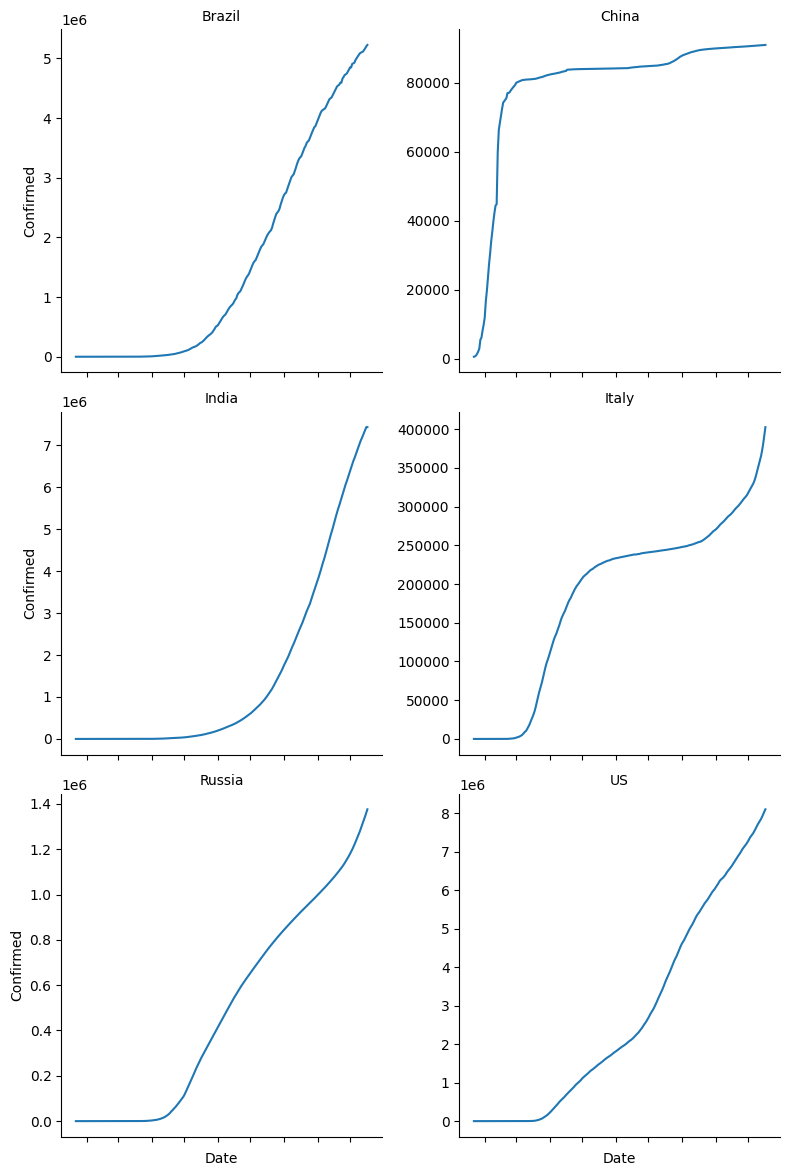

In [18]:
# Facet Plot (Trends per Country)

countries = ['India', 'US', 'Italy', 'Brazil', 'China', 'Russia']
df_subset = df[df['Country'].isin(countries)].groupby(['Date', 'Country'])[['Confirmed']].sum().reset_index()

g = sns.FacetGrid(df_subset, col="Country", col_wrap=2, height=4, sharey=False)
g.map(sns.lineplot, 'Date', 'Confirmed')
g.set_titles("{col_name}")
g.set_xticklabels(rotation=45)

plt.show()


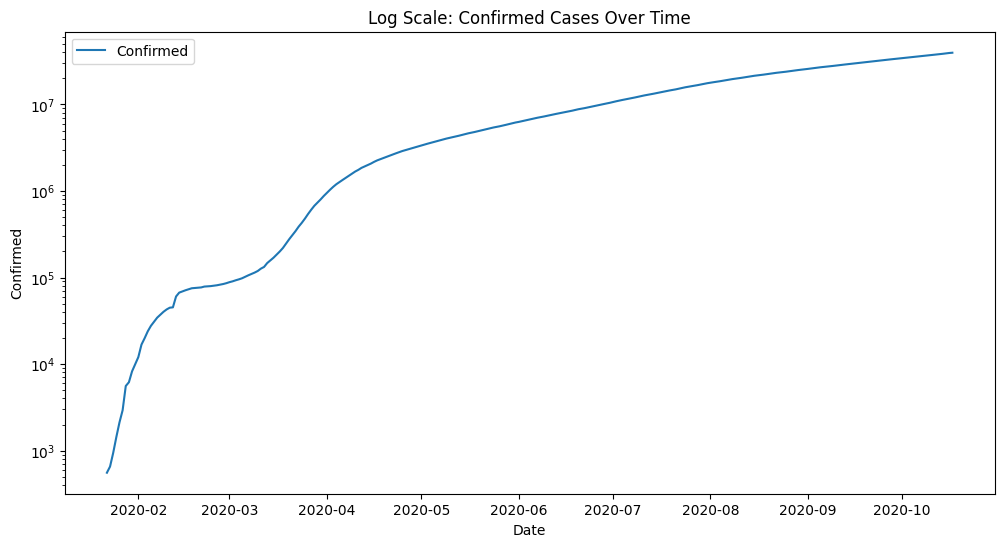

In [20]:
# Log Scale for Rapid Growth
plt.figure(figsize=(12,6))
sns.lineplot(data=df_global, x='Date', y='Confirmed', label='Confirmed')

plt.yscale('log')
plt.title('Log Scale: Confirmed Cases Over Time')

plt.show()